# 17 - Modeling Molecules

Let's try to model linear molecules as balls (atoms) connected through bonds (springs) and examine vibrational modes. Let's first start with diatomic molecules (containing two atoms, such as carbon monoxide CO) where $m_1$ is located at $x_1$ and $m_2$ is located at $x_2$ and $l$ is the equilibrium 'bond' length when at equilibrium.

<img src="images/Fig6_5a.jpg" alt="drawing" width="400"/>


The equations of motion for the atoms are:

\begin{equation*} \frac{\text{d}^2 x_1}{d\text{t}^2}=-\frac{k}{m_1}(x_1-x_2+l) \quad , \quad \frac{\text{d}^2 x_2}{d\text{t}^2}=-\frac{k}{m_2}(x_2-x_1-l). \end{equation*}

We can make these equations simpler by measuring positions with reference to their equilibrium positions $x^*_1$ and $x^*_2$ so that $x^*_2-x^*_1=l$. New variables quantifying ***displacements from equilibrium*** are then represented by 

\begin{equation*} u_1=x_1-x^*_1 \quad , \quad u_2=x_2-x^*_2. \end{equation*}

The simplified equations of motion are then given by

\begin{equation*} \frac{\text{d}^2 u_1}{\text{d}t^2} = -\frac{k}{m_1}(u_1-u_2) \quad , \quad \frac{\text{d}^2 u_2}{\text{d}t^2} = -\frac{k}{m_2}(u_2-u_1) \end{equation*}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def f(r,t):
    u1 = r[0]
    u2 = r[1]
    v1 = r[2]
    v2 = r[3]
        
    fu1 = v1
    fu2 = v2
    fv1 = -(k/m1)*(u1-u2)
    fv2 = -(k/m2)*(u2-u1)
    
    return fu1,fu2,fv1,fv2

k = 1.0
m1 = 0.25
m2 = 0.25

u1i = -0.2
u2i = 0.2
v1i = 0.0
v2i = 0.0
t0 = 0.0     
tf = 20.0    
N = 1000
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)

# set up array with initial values x0,y0,vx0,vy0
r = np.array([u1i,u2i,v1i,v2i],float)

rpoints = odeint(f,r,tpoints) 

u1points = rpoints[:,0]
u2points = rpoints[:,1]
v1points = rpoints[:,2]
v2points = rpoints[:,3]

plt.plot(tpoints,u1points,label='$u_1$')
plt.plot(tpoints,u2points,label='$u_2$')

plt.xlabel('$t$ (s)')
plt.ylabel('$u$ (m)')
plt.title('Harmonic motion')
plt.legend(loc='best')
plt.show()

In [ ]:
import vpython as vp

scene=vp.canvas()

xs = np.array([-3.0, 3.0]) # representing xstar1 and xstar2
atom = [0]*2
r = 1.0
col = [vp.vector(1,0,0), vp.vector(0,1,0)]

for i in range(2):
    atom[i] = vp.sphere(pos=vp.vector(xs[i],0,0), radius=r, color=col[i])

floor = vp.box(pos=vp.vector(0,-1.1,0), length=8, height=0.2, width=4)
s1 = vp.helix(pos=vp.vector(xs[0],0,0), thickness=0.1, radius=0.5)

for i in range(np.size(tpoints)):
    vp.rate(100)
    atom[0].pos.x = xs[0] + u1points[i] 
    atom[1].pos.x = xs[1] + u2points[i]
    s1.axis = vp.vector(1,0,0)
    s1.pos = vp.vector(xs[0] + u1points[i] + r,0,0)
    s1.length = (xs[1]+u2points[i]) - (xs[0]+u1points[i]) - 2*r

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Let's extend this idea to triatomic molecules

Diatomic molecules like CO can be shown to exhibit perfect SHO (at least, based on our current model) with $\omega=\sqrt{k/\mu}$ where $\mu=m_1 m_2/(m_1+m_2)$.

Triatomic molecules show more complex and interesting behaviors. 

### Student exercise:
How would you modify the diatomic molecule's equations of motion to describe a linear triatomic molecule like CO$_2$ (O-C-O)?

Diatomic molecules: \begin{equation*} \frac{\text{d}^2 u_1}{\text{d}t^2} = -\frac{k}{m_1}(u_1-u_2) \quad , \quad \frac{\text{d}^2 u_2}{\text{d}t^2} = -\frac{k}{m_2}(u_2-u_1) \end{equation*}

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
Answer (based on examining the forces on each atom):

\begin{equation*} \begin{aligned} \frac{\text{d}^2 u_1}{\text{d}t^2} &= -\frac{k}{m_1}(u_1-u_2) \\
\frac{\text{d}^2 u_2}{\text{d}t^2} &= -\frac{k}{m_2}(u_2-u_1) - \frac{k}{m_2}(u_2-u_3) \\
\frac{\text{d}^2 u_3}{\text{d}t^2} &= -\frac{k}{m_3}(u_3-u_2)
\end{aligned} \end{equation*} 

Vibrational behavior of this molecule can be simulated with the following code.

*(Try the following initial conditions $(u_1,u_2,u_3) = (-0.2, 0.2, 0.0)$ and initial velocities of zero for all three cases)*


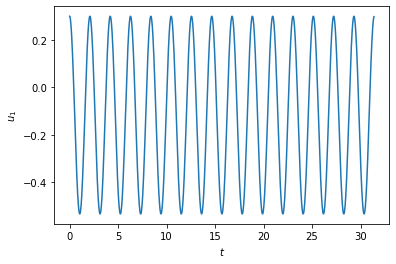

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def f(r,t):
    u1 = r[0]
    u2 = r[1]
    u3 = r[2]
    v1 = r[3]
    v2 = r[4]
    v3 = r[5]
        
    fu1 = v1
    fu2 = v2
    fu3 = v3
    fv1 = -(k/m1)*(u1-u2)
    fv2 = -(k/m2)*(u2-u1) - (k/m2)*(u2-u3)
    fv3 = -(k/m3)*(u3-u2)
    
    return fu1,fu2,fu3,fv1,fv2,fv3

k = 1.0
m1 = 0.25
m2 = 0.4
m3 = 0.25

      
u1i = -.5 
u2i = .3  
u3i = -.4  
v1i = 0.0
v2i = 0.0
v3i = 0.0
t0 = 0.0     
tf = 10.0*np.pi    
N = 1024
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)

# set up array with initial values x0,y0,vx0,vy0
r = np.array([u1i,u2i,u3i,v1i,v2i,v3i],float)

rpoints = odeint(f,r,tpoints) 

u1points = rpoints[:,0]
u2points = rpoints[:,1]
u3points = rpoints[:,2]
v1points = rpoints[:,3]
v2points = rpoints[:,4]
v3points = rpoints[:,5]

plt.plot(tpoints,u2points)

plt.xlabel('$t$')
plt.ylabel('$u_1$')
plt.show()

In [ ]:
import vpython as vp

scene=vp.canvas()

xs = np.array([-3.0, 0.0, 3.0]) # representing xstar1 and xstar2
atom = [0]*3
r = 1.0
col = [vp.vector(1,0,0), vp.vector(0,1,0), vp.vector(1,0,0)]

for i in range(3):
    atom[i] = vp.sphere(pos=vp.vector(xs[i],0,0), radius=r, color=col[i]) # Create three atoms

floor = vp.box(pos=vp.vector(0,-1.1,0), length=8, height=0.2, width=4)
s1 = vp.helix(pos=vp.vector(xs[0],0,0), thickness=0.1, radius=0.5) # Bond #1
s2 = vp.helix(pos=vp.vector(xs[1],0,0), thickness=0.1, radius=0.5) # Bond #2


for i in range(np.size(tpoints)):
    vp.rate(100)
    atom[0].pos.x = xs[0] + u1points[i] # x = xstar + u
    atom[1].pos.x = xs[1] + u2points[i]
    atom[2].pos.x = xs[2] + u3points[i]
    s1.axis = vp.vector(1,0,0)
    s1.pos = vp.vector(xs[0] + u1points[i] + r,0,0)
    s1.length = (xs[1]+u2points[i]) - (xs[0]+u1points[i]) - 2*r
    s2.axis = vp.vector(1,0,0)
    s2.pos = vp.vector(xs[1] + u2points[i] + r,0,0)
    s2.length = (xs[2]+u3points[i]) - (xs[1]+u2points[i]) - 2*r

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Fourier transforms assist in identifying the frequency components present in the observed fluctuations of atom \#1

### Student exercise: Produce a plot of the power spectrum associated with `u1points`. 
Plot `abs(s1)` vs $\omega$ where `s1` is the Fourier transform of `u1points`. Adjust your plot limits so that you only plot frequencies greater than zero and you can see the most important features.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
Pre-generated solution:

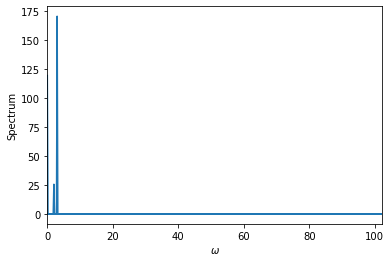

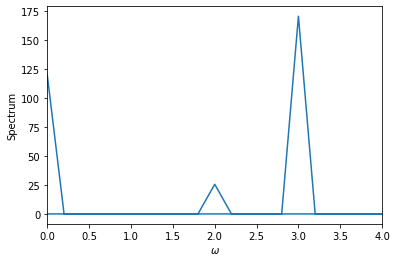

In [3]:
fft = np.fft

s1 = fft.fft(u1points)
w1 = 2*np.pi*fft.fftfreq(len(u1points),d=h)

plt.figure(1)
plt.plot(w1,abs(s1))
plt.xlim(0,max(w1))
plt.xlabel('$\omega$')
plt.ylabel('Spectrum')
plt.show()

plt.figure(2)
plt.plot(w1,abs(s1))
plt.xlim(0,4)
plt.xlabel('$\omega$')
plt.ylabel('Spectrum')
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## We can use linear algebra to find mode information

We expect solutions to our governing differential equations

\begin{equation*} \begin{aligned} \frac{\text{d}^2 u_1}{\text{d}t^2} &= -\frac{k}{m_1}(u_1-u_2) \\
\frac{\text{d}^2 u_2}{\text{d}t^2} &= -\frac{k}{m_2}(u_2-u_1) - \frac{k}{m_2}(u_2-u_3) \\
\frac{\text{d}^2 u_3}{\text{d}t^2} &= -\frac{k}{m_3}(u_3-u_2)
\end{aligned}\end{equation*} 

to be a superposition of harmonics that look like $u_i = a_i cos(\omega t + \varphi)$. If we plug these in, our equations become

\begin{equation*} \begin{aligned} ka_1 - ka_2 &= m_1\omega^2 a_1 \\
-ka_1 + 2ka_2-ka_3 &= m_2\omega^2 a_2 \\
-ka_2 +ka_3 &= m_3 \omega^2 a_3
\end{aligned}\end{equation*} 

which can be expressed in matrix form,

\begin{equation*} \begin{pmatrix} k & -k & 0 \\ -k & 2k & -k \\ 0 & -k & k \end{pmatrix} \begin{pmatrix} a_1 \\ a_2 \\ a_3 \end{pmatrix} = \omega^2 \begin{pmatrix} m_1 & 0 & 0 \\ 0 & m_2 & 0 \\ 0 & 0 & m_3 \end{pmatrix} \begin{pmatrix} a_1 \\ a_2 \\ a_3 \end{pmatrix} \end{equation*}

Let $\lambda=\omega^2$ and 

\begin{equation*} A = \begin{pmatrix} k & -k & 0 \\ -k & 2k & -k \\ 0 & -k & k \end{pmatrix}, \quad B= \begin{pmatrix} m_1 & 0 & 0 \\ 0 & m_2 & 0 \\ 0 & 0 & m_3 \end{pmatrix}, \quad {\bf{u}}= \begin{pmatrix} a_1 \\ a_2 \\ a_3 \end{pmatrix}.\end{equation*}

Then, we are left with an equation $A{\bf u} = \lambda B {\bf u}$ or $[A-\lambda B]{\bf u}=0$. This is the classic form of an ***eigenvalue equation***. Only certain values of $\lambda$ (called ***eigenvalues***) are possible solutions to this equation. Moreover, for each eigenvalue $\lambda$, we can find an associated ***eigenvector*** ${\bf u}$. Each eigenvalue corresponds to a normal mode of oscillation for our physical system (the triatomic molecule in this case).

There are some situations when one can analytically solve an eigenvalue equation (such as for this triatomic molecule). I'll leave that to your linear algebra professor. Instead, let's use a built-in SciPy function, `scipy.linalg.eigh` to do the hard work for us. 

See the example below:

In [1]:
import numpy as np
import scipy.linalg as linalg

k = 1.0
m1 = 1./4.
m2 = 2./5.
m3 = 1./4.
A = np.array([[k,-k,0],[-k,2*k,-k],[0,-k,k]])
B = np.array([[m1,0,0],[0,m2,0],[0,0,m3]])

lamb, u = linalg.eigh(A,B)
for i in range(len(lamb)):
    print('Eigenvalue lambda {0:2f} corresponding to omega {1:2f} has eigenvector {2}.'.format(lamb[i],np.sqrt(lamb[i]),u[:,i]))

Eigenvalue lambda 0.000000 corresponding to omega 0.000000 has eigenvector [-1.05409255 -1.05409255 -1.05409255].
Eigenvalue lambda 4.000000 corresponding to omega 2.000000 has eigenvector [-1.41421356e+00 -3.22274390e-16  1.41421356e+00].
Eigenvalue lambda 9.000000 corresponding to omega 3.000000 has eigenvector [ 0.94280904 -1.1785113   0.94280904].


These are the same resonant frequencies that we had found from the fft method! Plug these in as initial velocities above to see animations of these fundamental modes.

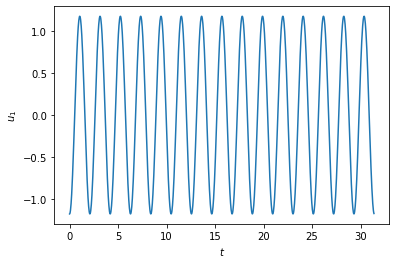

<IPython.core.display.Javascript object>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def f(r,t):
    u1 = r[0]
    u2 = r[1]
    u3 = r[2]
    v1 = r[3]
    v2 = r[4]
    v3 = r[5]
        
    fu1 = v1
    fu2 = v2
    fu3 = v3
    fv1 = -(k/m1)*(u1-u2)
    fv2 = -(k/m2)*(u2-u1) - (k/m2)*(u2-u3)
    fv3 = -(k/m3)*(u3-u2)
    
    return fu1,fu2,fu3,fv1,fv2,fv3

k = 1.0
m1 = 0.25
m2 = 0.4
m3 = 0.25

      
u1i = .94 
u2i = -1.18  
u3i = .94  
v1i = 0.0
v2i = 0.0
v3i = 0.0
t0 = 0.0     
tf = 10.0*np.pi    
N = 1024
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)

# set up array with initial values x0,y0,vx0,vy0
r = np.array([u1i,u2i,u3i,v1i,v2i,v3i],float)

rpoints = odeint(f,r,tpoints) 

u1points = rpoints[:,0]
u2points = rpoints[:,1]
u3points = rpoints[:,2]
v1points = rpoints[:,3]
v2points = rpoints[:,4]
v3points = rpoints[:,5]

plt.plot(tpoints,u2points)

plt.xlabel('$t$')
plt.ylabel('$u_1$')
plt.show()

######## ANIMATIONS #################

import vpython as vp

scene=vp.canvas()

xs = np.array([-3.0, 0.0, 3.0]) # representing xstar1 and xstar2
atom = [0]*3
r = 1.0
col = [vp.vector(1,0,0), vp.vector(0,1,0), vp.vector(1,0,0)]

for i in range(3):
    atom[i] = vp.sphere(pos=vp.vector(xs[i],0,0), radius=r, color=col[i]) # Create three atoms

floor = vp.box(pos=vp.vector(0,-1.1,0), length=8, height=0.2, width=4)
s1 = vp.helix(pos=vp.vector(xs[0],0,0), thickness=0.1, radius=0.5) # Bond #1
s2 = vp.helix(pos=vp.vector(xs[1],0,0), thickness=0.1, radius=0.5) # Bond #2


for i in range(np.size(tpoints)):
    vp.rate(100)
    atom[0].pos.x = xs[0] + u1points[i] # x = xstar + u
    atom[1].pos.x = xs[1] + u2points[i]
    atom[2].pos.x = xs[2] + u3points[i]
    s1.axis = vp.vector(1,0,0)
    s1.pos = vp.vector(xs[0] + u1points[i] + r,0,0)
    s1.length = (xs[1]+u2points[i]) - (xs[0]+u1points[i]) - 2*r
    s2.axis = vp.vector(1,0,0)
    s2.pos = vp.vector(xs[1] + u2points[i] + r,0,0)
    s2.length = (xs[2]+u3points[i]) - (xs[1]+u2points[i]) - 2*r

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Additional linear algebra functionality is included in SciPy

Another commonly used function for linear algebra applications is `scipy.linalg.solve`. If we have an equation $A{\bf x} = {\bf v}$ where $A$ is a matrix and $x$ and $v$ are vectors, we can solve the equation using the command `x = scipy.linalg.solve(A,v)`

So, if we have a system of ***linear*** equations 

\begin{equation*} \begin{aligned} 2w+x+4y+z = -4 \\
3w + 4x -y-z = 3 \\
w - 4x + y + 5z = 9 \\
2w - 2x +y+3z=7
\end{aligned}\end{equation*} 

it can be re-expressed in the requisite matrix form

\begin{equation*} \begin{pmatrix} 2 & 1 & 4 & 1 \\ 3 & 4 & -1 & -1 \\ 1 & -4 & 1 & 5 \\ 2 & -2 & 1 & 3 \end{pmatrix} \begin{pmatrix} w \\ x \\ y \\ z \end{pmatrix} =  \begin{pmatrix} -4 \\ 3 \\ 9 \\ 7\end{pmatrix}\end{equation*}

Solve this system of equations using `scipy.linalg.solve`.

In [6]:
import numpy as np
import scipy.linalg as linalg

A = np.array([[2,1,4,1],[3,4,-1,-1],[1,-4,1,5],[2,-2,1,3]])
v = np.array([-4,3,9,7])

x = linalg.solve(A,v)
print('w = {0:.2f}, x = {1:.2f}, y = {2:.2f}, z = {3:.2f}'.format(x[0],x[1],x[2],x[3]))

w = 2.00, x = -1.00, y = -2.00, z = 1.00


In [4]:
import numpy as np
import scipy.linalg as linalg

A = np.array([[1,-1,-1],[5,10,0],[5,0,5]])
v = np.array([0,15,21])

x = linalg.solve(A,v)
print('I1 = {0:.3f}, I2 = {1:.3f}, I3 = {2:.3f}'.format(x[0],x[1],x[2]))

I1 = 2.280, I2 = 0.360, I3 = 1.920


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

#### Pre-generated solution:

In [ ]:
import numpy as np
import scipy.linalg as linalg

A = np.array([[2,1,4,1],[3,4,-1,-1],[1,-4,1,5],[2,-2,1,3]])
v = np.array([-4,3,9,7])

x = linalg.solve(A,v)
print('w = {0:.2f}, x = {1:.2f}, y = {2:.2f}, z = {3:.2f}'.format(x[0],x[1],x[2],x[3]))